# Cleaning/Formatting Flat Data Source

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
books.shape # 4 books were skipped due to errors of the csv. D needs to be combined with C column

(11123, 12)

In [4]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
# There is a space in the column num_pages
books.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
# I want to format the date and only keep the year
books['publication_year'] = pd.to_datetime(books['publication_date'], format='%m/%d/%Y', errors='coerce')
books['publication_year'] = books.publication_year.dt.strftime('%Y')

In [8]:
# Some variables do not provide information, such as bookID, publication_date, and isbn. Now that I have publication year,
# I am not interested in publication data and the standard isbn used today is 13 digits, so I will keep isbn13.
books = books.drop(['bookID', 'publication_date', 'isbn'], axis=1)

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,9780439785969,eng,652,2095690,27591,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,9780439358071,eng,870,2153167,29221,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,9780439554893,eng,352,6333,244,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,9780439655484,eng,435,2339585,36325,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,9780439682589,eng,2690,41428,164,Scholastic,2004


In [9]:
# I want to make a list of the categorical variables
cat_vars = ['language_code', 'publisher']
for var in cat_vars: # Loops through each variable in the list I just created
    classes = books[var].unique() # For each variable in the list, the unique classes will be returned.
    num = books[var].nunique() # For each variable, the number of the unique classes will be returned.
    print("\n'{}' has {} classes.\n {}".format(var, num, classes))


'language_code' has 27 classes.
 ['eng' 'en-US' 'fre' 'spa' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'ger' 'jpn'
 'ara' 'nl' 'zho' 'lat' 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe'
 'nor' 'tur' 'gla' 'ale']

'publisher' has 2290 classes.
 ['Scholastic Inc.' 'Scholastic' 'Nimble Books' ... 'Suma'
 'Panamericana Editorial' 'Editorial Presença']


In [10]:
print('Describe Data')
print(books.describe())
print('Summarized Data')
print(books.describe(include=['O']))

Describe Data
       average_rating        isbn13     num_pages  ratings_count  \
count    11123.000000  1.112300e+04  11123.000000   1.112300e+04   
mean         3.934075  9.759880e+12    336.405556   1.794285e+04   
std          0.350485  4.429758e+11    241.152626   1.124992e+05   
min          0.000000  8.987060e+09      0.000000   0.000000e+00   
25%          3.770000  9.780345e+12    192.000000   1.040000e+02   
50%          3.960000  9.780582e+12    299.000000   7.450000e+02   
75%          4.140000  9.780872e+12    416.000000   5.000500e+03   
max          5.000000  9.790008e+12   6576.000000   4.597666e+06   

       text_reviews_count  
count        11123.000000  
mean           542.048099  
std           2576.619589  
min              0.000000  
25%              9.000000  
50%             47.000000  
75%            238.000000  
max          94265.000000  
Summarized Data
                         title       authors language_code publisher  \
count                    11123   

In [11]:
# I see the minimum num_pages is 0. I want to see how many other books are recorded as having 0 pages.
sum(books.num_pages == 0)

76

In [12]:
# There are 76 books that are recorded as having 0 pages. 
sum(books.num_pages <= 100)

1045

In [13]:
# There are 1045 books that are recorded as having less than 100 pages. I was going to drop these observations 
# from the dataset. However, I know that another data source of mine has the variable number_of_pages so for now
# I will keep all observations.


books[books.title == 'The Brothers Karamazov'] 

,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year
1406,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Manuel Ko...,4.32,9780451527349,eng,736,983,91,Signet Classics,1999
1407,The Brothers Karamazov,Fyodor Dostoyevsky/Fyodor Dostoevsky/Richard P...,4.32,9780374528379,eng,796,191531,6795,Farrar Straus and Giroux,2002
1408,The Brothers Karamazov,Fyodor Dostoyevsky/David McDuff,4.32,9780140449242,eng,1013,1673,184,Penguin Books Ltd,2003
1409,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,9780679729259,eng,796,617,80,Vintage Books USA,1991
1410,The Brothers Karamazov,Fyodor Dostoyevsky/Simon Vance/Thomas R. Beyer...,4.32,9781596440791,eng,16,20,2,Hovel Audio,2005
1411,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Maire Jaanus,4.32,9781593080457,eng,720,1089,202,Barnes Noble Classics,2004
1634,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,9780099922803,eng,796,443,55,Vintage Classics,1992
1990,The Brothers Karamazov,Fyodor Dostoyevsky/Andrew R. MacAndrew/Konstan...,4.32,9780553212167,eng,1072,1022,154,Bantam Classics,1984
9352,The Brothers Karamazov,Fyodor Dostoyevsky/Thomas R. Beyer Jr./Simon V...,4.32,9781596440784,eng,16,3,1,Hovel Audio,2005


In [14]:
# Check for duplicates
for variable in books:
    duplicates = books[variable].duplicated().sum()
    if duplicates > 0:
        print('{} has {} duplicate values.'.format(variable, duplicates))
    else:
        print('{} has no duplicate values.'.format(variable))

title has 775 duplicate values.
authors has 4484 duplicate values.
average_rating has 10914 duplicate values.
isbn13 has no duplicate values.
language_code has 11096 duplicate values.
num_pages has 10126 duplicate values.
ratings_count has 5829 duplicate values.
text_reviews_count has 9301 duplicate values.
publisher has 8833 duplicate values.
publication_year has 11035 duplicate values.


In [59]:
# There are many duplicates. This is expected for most of the variables. Luckily, isbn13 has no duplicate values. This
# means that duplicate titles are likely to have many different publishers or published in different languages.

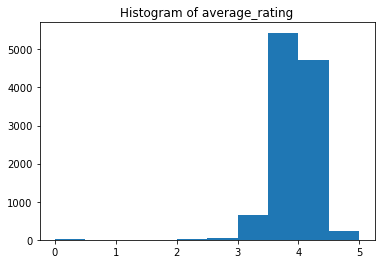

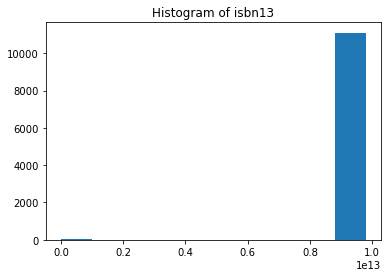

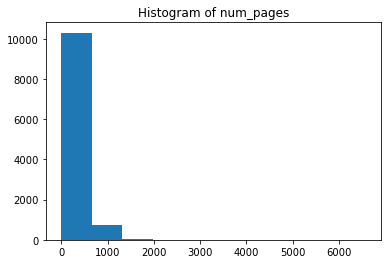

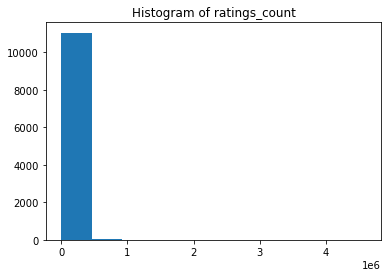

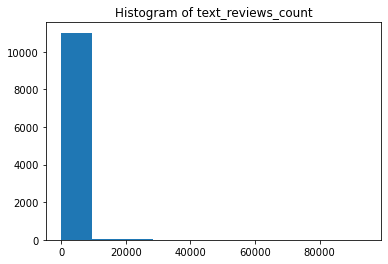

In [15]:
# Histograms of numerical variables
num_vars = ['average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count']
for variable in num_vars: # This loop will access each variable
    plt.hist(books[variable]) # This will plot a histogram of each variable
    plt.title('Histogram of '+ variable) # This will label each histogram using a unique title containing the variable name.
    plt.show()

In [16]:
# isbn13 is a 13 digit number. Any values that do not have 13 digits should be removed. 
len(books[books['isbn13'] < 999999999999]) # There are 25 
books[books['isbn13'] < 999999999999]

books = books[books['isbn13'] > 999999999999] 

In [17]:
# I want to remove text in parentheses from the titles and convert them to lowercase
books['title'] = books['title'].apply(lambda x: x.split('(')[0])
books['title_lower'] = books['title'].apply(lambda x: x.strip().lower())

In [18]:
# Then, I will save the clean data as a CSV file
books.to_csv('clean_csvbooks.csv', sep=',', index=False) 